### Shadow and Gaussian $\Sigma$ matrix comparison

Shadow code from 'sirepo_demo_kb_gsn02' simulation on sirepo.com/shadow

In [1]:
import numpy as np
import shadow_blicon_util as sbu
import transfer_mat_bl as tmb
import Shadow.ShadowTools

%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

#### Beam parameters

In [2]:
ph_E = 9e3        # photon energy [eV]
sigx_init = 1e-3  # initial horizontal beam size [cm]
sigz_init = 1e-3  # initial vertical beam size [cm]
sigdix_init = 1.1200929999999999e-06  # initial horizontal divergence [rad]
sigdiz_init = 1.1200929999999999e-06  # initial vertical divergence [rad]

#### Calculate coherence

In [3]:
# wavelength [cm]
hc = 1.2398419843320026   # hc quantity [eV micron]
ph_lambda = hc / ph_E * 1e-6 * 1e2

# calculate m squared values horizontal and vertical
m_sq_x = sigx_init * sigdix_init / (ph_lambda / 4 / np.pi)
m_sq_z = sigz_init * sigdiz_init / (ph_lambda / 4 / np.pi)

print('m squared value horizontal: %s' %(m_sq_x)) 
print('m squared value vertical: %s' %(m_sq_z)) 

m squared value horizontal: 1.021739346189318
m squared value vertical: 1.021739346189318


#### Run Shadow simulation with dense Gaussian dist rays

In [4]:
beam_gsn_init = sbu.shadow_src_beam(n_rays=10000, ran_seed=15829, dist_type=3, sigx=sigx_init, sigz=sigz_init, 
                                sigdix=sigdix_init, sigdiz=sigdiz_init, hdiv1 = 0.0, hdiv2 = 0.0, vdiv1 =0.0, 
                                vdiv2=0.0, ph_energy = 9e3)
beam_gsn_fin = sbu.run_shdw_kb_gsn(beam_gsn_init)

 Generated          500  rays out of        10000
                   1000
                   1500
                   2000
                   2500
                   3000
                   3500
                   4000
                   4500
                   5000
                   5500
                   6000
                   6500
                   7000
                   7500
                   8000
                   8500
                   9000
                   9500
                  10000
 Exit from SOURCE
 Call to RESET
 Exit from RESET
 Call to SETSOUR
 Exit from SETSOUR
 Call to IMREF
 Exit from IMREF
 Call to OPTAXIS
 Exit from OPTAXIS
 Call to MSETUP
 Exit from MSETUP
 Call to RESTART
 Exit from RESTART
 Call to MIRROR
 Exit from MIRROR
 Call to IMAGE
 Exit from IMAGE
 Call to DEALLOC
 Exit from DEALLOC
 Call to RESET
 Exit from RESET
 Call to SETSOUR
 Exit from SETSOUR
 Call to IMREF
 Exit from IMREF
 Call to OPTAXIS
 Exit from OPTAXIS
 Call to MSETUP
 Exit from MSETU

/home/vagrant/jupyter/rslight/shadow/shadow_blicon_util.py:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(np.multiply(xvals_beam,10), np.multiply(yvals_beam,10), data_beam, cmap=plt.cm.Blues)


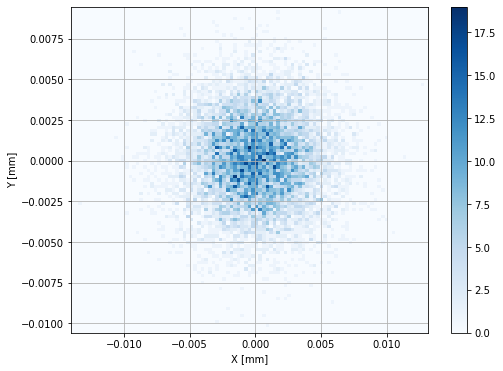

In [5]:
sbu.shdw_plt(beam_gsn_fin)

#### Run Shadow simulation for transfer mat calculation

In [6]:
epsilon = 1e-6    # beam offest parameter

# create initial set of 4 offset rays and 1 central ray
beam_tmat_init = tmb.create_mat_rays(epsilon)

# pass initial rays through beamline
beam_tmat_fin = sbu.run_shdw_kb_gsn(beam_tmat_init)

# calculate transfer matrix from final propagated rays
tmat, x_prop_cen, xp_prop_cen, z_prop_cen, zp_prop_cen = tmb.tmat_calc(beam_tmat_fin, epsilon)

print('transfer matrix:', tmat)

transfer matrix: [[ 3.15789412e-01 -4.08701414e-08 -4.43172110e-08 -7.33229959e-08]
 [ 1.46198835e-03  3.16647826e+00  0.00000000e+00  3.46942858e-11]
 [ 1.30264188e-08  4.20819965e-09  2.71186421e-01  4.16606901e-09]
 [ 6.93889388e-12 -1.53585795e-20  1.58898306e-03  3.68774685e+00]]
 Exit from SOURCE
 Call to RESET
 Exit from RESET
 Call to SETSOUR
 Exit from SETSOUR
 Call to IMREF
 Exit from IMREF
 Call to OPTAXIS
 Exit from OPTAXIS
 Call to MSETUP
 Exit from MSETUP
 Call to RESTART
 Exit from RESTART
 Call to MIRROR
 Exit from MIRROR
 Call to IMAGE
 Exit from IMAGE
 Call to DEALLOC
 Exit from DEALLOC
 Call to RESET
 Exit from RESET
 Call to SETSOUR
 Exit from SETSOUR
 Call to IMREF
 Exit from IMREF
 Call to OPTAXIS
 Exit from OPTAXIS
 Call to MSETUP
 Exit from MSETUP
 Call to RESTART
 Exit from RESTART
 Call to MIRROR
 MIRROR1: Warning: Empty element (no mirr.xx file)
 Call to IMAGE
 Exit from IMAGE
 Call to DEALLOC
 Exit from DEALLOC
 Call to RESET
 Exit from RESET
 Call to SETSOU

In [23]:
# sbu.shdw_plt(beam_tmat_fin)

##### Check symplecticity
$$T^T J T = J$$

In [7]:
jmat = np.matrix([
    [0, 1, 0, 0],
    [-1, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, -1, 0],
])

jmat_calc = np.matmul(np.matmul(tmat.T, jmat), tmat)

print('tmat:', tmat)
print('jmat:', jmat)
print('jmat_calc:', np.round(jmat_calc, 4))

tmat: [[ 3.15789412e-01 -4.08701414e-08 -4.43172110e-08 -7.33229959e-08]
 [ 1.46198835e-03  3.16647826e+00  0.00000000e+00  3.46942858e-11]
 [ 1.30264188e-08  4.20819965e-09  2.71186421e-01  4.16606901e-09]
 [ 6.93889388e-12 -1.53585795e-20  1.58898306e-03  3.68774685e+00]]
jmat: [[ 0  1  0  0]
 [-1  0  0  0]
 [ 0  0  0  1]
 [ 0  0 -1  0]]
jmat_calc: [[ 0.      0.9999  0.      0.    ]
 [-0.9999  0.      0.      0.    ]
 [-0.     -0.      0.      1.0001]
 [-0.     -0.     -1.0001  0.    ]]


#### Calculate RMS size for Shadow Gaussian dist propagation

In [20]:
sigmax = sbu.rays_sigma(beam_gsn_fin, 0, 0)
# sigdix = sbu.rays_sigma(rays, 3)
sigmaz = sbu.rays_sigma(beam_gsn_fin, 2, 2)
# sigdiz = sbu.rays_sigma(rays, 5)
print('sigmax: %s [um], sigmaz: %s [um]' %(sigmax*1e4, sigmaz*1e4))

sigmax: 3.129507823412833 [um], sigmaz: 2.7009959820438136 [um]


##### Propagate Sigma matrix with transfer matrix
$$T\Sigma T^T$$

In [13]:
# create initial sigma matrix
res = np.matrix([
        [sigx_init ** 2, 0, 0, 0],
        [0, sigdix_init ** 2, 0, 0],
        [0, 0, sigz_init ** 2, 0],
        [0, 0, 0, sigdiz_init ** 2],
    ])

In [14]:
# propagate sigma matrix with transfer matrix
res_prop = np.matmul(np.matmul(tmat, res), tmat.T)

In [15]:
print('initial sigma matrix:', res)
print('propagated sigma matrix:', res_prop)

initial sigma matrix: [[1.00000000e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.25460833e-12 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e-06 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.25460833e-12]]
propagated sigma matrix: [[ 9.97229529e-08  4.61680442e-10 -7.90462071e-15 -6.85673101e-17]
 [ 4.61680442e-10  1.47168465e-11  1.90611904e-17  1.03051013e-20]
 [-7.90462071e-15  1.90611904e-17  7.35420750e-08  4.30910628e-10]
 [-6.85673101e-17  1.03051013e-20  4.30910628e-10  1.95868840e-11]]


In [21]:
print('sigmax from sigma matrix tmat calc: %s' %(np.sqrt(res_prop[0,0])*1e4))
print('sigmaz from sigma matrix tmat calc: %s' %(np.sqrt(res_prop[2,2])*1e4))

sigmax from sigma matrix tmat calc: 3.1578941222123174
sigmaz from sigma matrix tmat calc: 2.7118642107078896


In [9]:
# Shadow.ShadowTools.plotxy(beam, 1, 3, nbins=100, nolost=1)